1) a function FirstReturnZero(N) that generates a 1D random walk, starting at 0 and randomly adding or subtracting 1 at each step (the two possibilities are equally likely), until the first time T when the walk returns to 0. If the random walk does not return to zero within N steps, return N. The output should always be an integer btwn 1 and N.

examples with N = 10:
- if we generate the walk 0, 1, 0, then we return 2
- if we generate the walk 0, -1, -2, -1, -2, -1, 0, then we return 6

2) run this function 1000 times with N = 1000
3) use matplotlib to create a histogram of these times (use a separate bin for each positive integer up through the maximum return time, and describe histogram qualitatively)
4) compute the average of your 1000 return times.

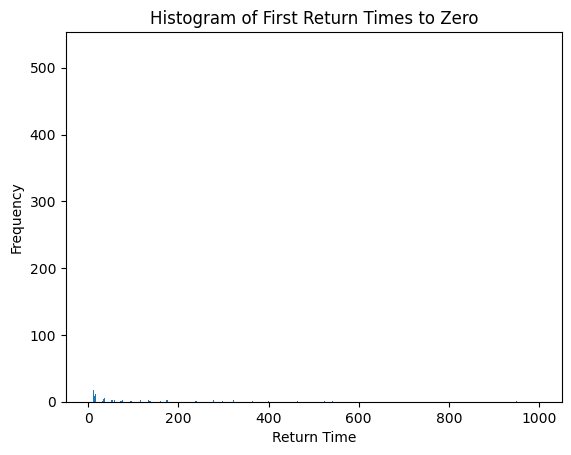

average return time: 44.994


In [2]:
import random
import matplotlib.pyplot as plt

# part 1)
def FirstReturnZero(N):
    position = 0
    for step in range(1, N, +1):
        position += random.choice([-1, 1])
        if position == 0:
            return step
    return N

random.seed(31)

# part 2)
return_times = [FirstReturnZero(1000) for _ in range(1000)]

# part 3)
plt.hist(return_times, bins=range(1, max(return_times) +2), align='left', rwidth=0.8)
plt.xlabel('Return Time')
plt.ylabel('Frequency')
plt.title('Histogram of First Return Times to Zero')
plt.show()

# part 4)
average_return_time = sum(return_times) / len(return_times)
print(f"average return time: {average_return_time}")


1) write a function WhosAhead(N) that takes as input a positive integer N and does the following. Generate N fair coin flips of heads/tails e.g., HTTHHHTHTH), and keep track of the number Nn of heads in the first n flips for 1<= n <= N. Return the porportion of times n at which the number of heads so far the greater than the number of tails so far (in other words, Nn > n - Nn).
examples with N = 10:
- if we get HTTTHHHHHH, then there are more heads so far at times 1, 7, 8, 9, 10, so we return 0.5
- If we get THTHTHTHTH, then we return 0.
  
2) run this function 1000 times with N = 1000
3) use matplotlib to create a histogram of the resulting proportions (use 100 bins of equal width covering the interval from 0 to 1, and describe your histogram qualitatively)
4) relate the overall shape of the histogram to previous question.

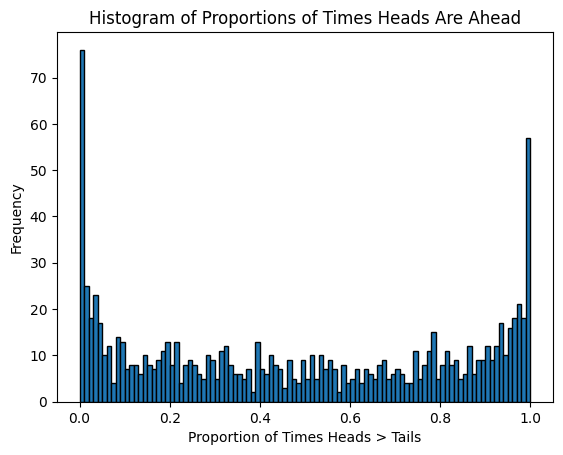

In [11]:
# part 1)
def WhosAhead(N):
    heads_count = 0
    ahead_count = 0
    for n in range(1, N + 1):
        if random.choice(['H', 'T']) == 'H':
            heads_count += 1
        if heads_count > (n - heads_count):  # Check if heads > tails
            ahead_count += 1
    return ahead_count / N

random.seed(31)

# part 2)
proportions = [WhosAhead(1000) for _ in range(1000)]

# part 3)
plt.hist(proportions, bins=100, range=(0, 1), edgecolor='black')
plt.xlabel('Proportion of Times Heads > Tails')
plt.ylabel('Frequency')
plt.title('Histogram of Proportions of Times Heads Are Ahead')
plt.show()

# part 4)
# in the previous question the histogram of return times showed that most of the time, the random walk returns to 0 relatively quickly, but there were occasional longer return times
# similariy, in this question, the histogram porpotions shows that heads are often ahead about half the time, but there is variability around this central value. this variability is related to the randomness of the coin flips and the probabilistic nature of the process